In [5]:
import numpy as np
from sklearn.cluster import KMeans
import time
import os
import json
import matplotlib.pyplot as plt
import operator
src = "清水寺_Titlize" # DB 讀取來源 collection
filePath = "C:\\Users\\Java\\Desktop\\TM"
focus = "allTags" # 欲加強的目標
multi = 100  # 加強目標的權重
nowtime = time.strftime("%m%d")
loadDate = "0914"
kwNum = 5
# "渡月橋" Togetsukyō
# "平等院鳳凰堂"  Byōdōin
# "千本鳥居" Fushimi-Inari Taisha
# "京都御所" Kyōto gosho
# "京都塔" kyoto tower
# "二條城" Nijō-jō
# "三十三間堂" Sanjūsangen-dō
# "清水寺" Kiyomizu-dera
# "金閣寺" Rokuonji

In [6]:
# load 關鍵字     ->    list atcKwList
f = open(filePath + "\\clustering\\keywordsSets\\{}kw-{}-weight-{}-{}keywords{}.txt".format(kwNum, multi, focus, str(src), loadDate), 'r', encoding="utf-8")
atcKwList = json.load(f)
f.close()

In [7]:
# load 關鍵字set   ->   list kws
kws = []
f = open(filePath + "\\clustering\\keywordsSets\\{}kw-{}-weight-{}-{}kwSet{}.txt".format(kwNum, multi, focus, str(src), loadDate), 'r', encoding="utf-8")
kw = f.readlines()
for i in kw:
    kws.append(i.strip())
kws.remove('url')
kws.remove('title')

f.close()

In [4]:
# np.zeros( (3,4) )
table = np.zeros( (len(atcKwList), len(kws) ) )
table.shape

(7323, 3278)

In [ ]:
["A", "B", "C"]

In [8]:
# 將 table 填入值
#cnt = 0
for i in range(0, len(atcKwList)):
    for word in atcKwList[i]:
        if word in kws:
            #cnt +=1
            idx = kws.index(word)
            table[i, idx] = atcKwList[i][word]

In [10]:
import pandas as pd

In [11]:
df = pd.DataFrame(table, columns = kws)
# df.loc[500:505,["雪", "茶", "清水寺", "平等院鳳凰堂", "浴衣", "賞楓", "賞櫻", "賞櫻", "藥妝", "美食", "機票"]]
#print(sorted(df.sum(), reverse=True))

In [14]:
df.iloc[:10, 200:210]

,鳥,春季例大祭,CafeIndependants,日之出咖哩烏龍麵,管家,ers,鮪,附件,紅葉名,寶玉堂
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.077682,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [8]:
col_avg = np.average(df.sum(0))

In [9]:
np.array(df.sum(0) > col_avg)

array([False, False, False, ...,  True, False, False], dtype=bool)

In [10]:
df_Reduc1 = df.loc[:,np.array(df.sum(0) > col_avg)]

In [11]:
df_Reduc1.shape

(7323, 389)

In [12]:
### Pandas 語法
# Data Frame 取值 :  df.loc[:,"清水寺"]

# 刪除col  :   del df['column_name']

In [13]:
# 列出 column 數值統計

# x = 0
# for i in kws:    
#     x += 1
#     if x <5 :
#         pp = df[i].value_counts()#.count(True)
#         print(pp)

In [14]:
# 該 row 非0的個數，應該跟 每篇文章給的 keywords數量一樣
np.count_nonzero(table[1])

5

In [15]:
# 標準化column

In [16]:
# from sklearn.preprocessing import StandardScaler

##### 太多 0 沒什麼必要做standardize

## K-Means

## Use Full algorithm #  “full” for sparse data

In [17]:
# 
startT = time.time()
X = df_Reduc1
# 看看要分幾組
lowerClst = 4
upperClst = 20 
distortions = []

for i in range(lowerClst, upperClst):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0,
                algorithm='full')
    km.fit(X)
    distortions.append(km.inertia_)
DoneT = time.time()
print("Kmeans choose cluster number : {}".format(DoneT - startT))

Kmeans choose cluster number : 52.88300013542175


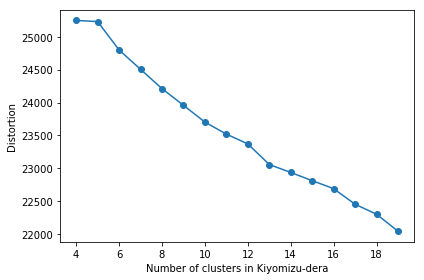

In [18]:
plt.plot(range(lowerClst, upperClst), distortions, marker='o')
plt.xlabel('Number of clusters in Kiyomizu-dera'.format(src))
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()
# plt.savefig('{}kMeansDistortion.jpg'.format(src))

## 389 features

In [19]:
clusterNum = 15
km = KMeans(n_clusters=clusterNum, 
            init='k-means++', 
            n_init=15, 
            max_iter=300,
            tol=1e-04,
            random_state=5,
            algorithm="full")  #  “full” for sparse data
y_km = km.fit_predict(df_Reduc1)
# 每一群個數 
unique, counts = np.unique(km.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 22,
 1: 5798,
 2: 2,
 3: 1,
 4: 545,
 5: 13,
 6: 4,
 7: 1,
 8: 5,
 9: 64,
 10: 358,
 11: 98,
 12: 86,
 13: 79,
 14: 247}

In [20]:
cluster = np.where(km.labels_ == 0)[0]
wordCntDict = {}
for i in cluster:
    for j in atcKwList[i]:
        if j not in wordCntDict:
            wordCntDict[j] = 1
        else:
            wordCntDict[j] +=1
del wordCntDict['url']
del wordCntDict['title']
sorted(wordCntDict.items(), key=operator.itemgetter(1), reverse = True)[0:10]

[('比叡山', 20),
 ('嵯峨野', 4),
 ('常寂光寺', 4),
 ('西明寺', 3),
 ('高山寺', 3),
 ('夜楓', 3),
 ('嵐山', 3),
 ('遊船', 3),
 ('天龍寺', 3),
 ('貴船神社', 2)]

In [21]:
cluster = np.where(km.labels_ == 1)[0]
wordCntDict = {}
for i in cluster:
    for j in atcKwList[i]:
        if j not in wordCntDict:
            wordCntDict[j] = 1
        else:
            wordCntDict[j] +=1
del wordCntDict['url']
del wordCntDict['title']
sorted(wordCntDict.items(), key=operator.itemgetter(1), reverse = True)[0:10]

[('京都', 695),
 ('嵐山', 693),
 ('才', 640),
 ('心齋橋', 594),
 ('和服', 495),
 ('伏見稻荷', 484),
 ('金閣寺', 415),
 ('難波', 372),
 ('道頓崛', 343),
 ('錦市場', 324)]

In [22]:
cluster = np.where(km.labels_ == 2)[0]
wordCntDict = {}
for i in cluster:
    for j in atcKwList[i]:
        if j not in wordCntDict:
            wordCntDict[j] = 1
        else:
            wordCntDict[j] +=1
del wordCntDict['url']
del wordCntDict['title']
sorted(wordCntDict.items(), key=operator.itemgetter(1), reverse = True)[0:10]

[('花之繪姿', 2),
 ('和服', 2),
 ('賞楓', 1),
 ('京都', 1),
 ('穿三小時', 1),
 ('Ppt', 1),
 ('讀版', 1),
 ('遊記', 1)]

In [23]:
cluster = np.where(km.labels_ == 3)[0]
wordCntDict = {}
for i in cluster:
    for j in atcKwList[i]:
        if j not in wordCntDict:
            wordCntDict[j] = 1
        else:
            wordCntDict[j] +=1
del wordCntDict['url']
del wordCntDict['title']
sorted(wordCntDict.items(), key=operator.itemgetter(1), reverse = True)[0:10]

[('鴨川納涼床', 1), ('先斗町', 1), ('錦市場', 1), ('祇園', 1), ('金閣寺', 1)]

In [24]:
cluster = np.where(km.labels_ == 4)[0]
wordCntDict = {}
for i in cluster:
    for j in atcKwList[i]:
        if j not in wordCntDict:
            wordCntDict[j] = 1
        else:
            wordCntDict[j] +=1
del wordCntDict['url']
del wordCntDict['title']
sorted(wordCntDict.items(), key=operator.itemgetter(1), reverse = True)[0:10]

[('難波', 544),
 ('心齋橋', 137),
 ('伏見稻荷', 90),
 ('道頓崛', 76),
 ('黑門市場', 75),
 ('嵐山', 69),
 ('淀屋橋', 63),
 ('和服', 40),
 ('金閣寺', 37),
 ('京都', 35)]

In [25]:
cluster = np.where(km.labels_ == 5)[0]
wordCntDict = {}
for i in cluster:
    for j in atcKwList[i]:
        if j not in wordCntDict:
            wordCntDict[j] = 1
        else:
            wordCntDict[j] +=1
del wordCntDict['url']
del wordCntDict['title']
sorted(wordCntDict.items(), key=operator.itemgetter(1), reverse = True)[0:10]

[('夜楓', 13),
 ('永觀堂', 8),
 ('京都', 7),
 ('高台寺', 5),
 ('清水寺', 3),
 ('東本願寺', 2),
 ('賞楓', 2),
 ('才', 1),
 ('當日賞', 1),
 ('門票', 1)]

In [26]:
cluster = np.where(km.labels_ == 6)[0]
wordCntDict = {}
for i in cluster:
    for j in atcKwList[i]:
        if j not in wordCntDict:
            wordCntDict[j] = 1
        else:
            wordCntDict[j] +=1
del wordCntDict['url']
del wordCntDict['title']
sorted(wordCntDict.items(), key=operator.itemgetter(1), reverse = True)[0:10]

[('Taro', 4),
 ('道頓崛', 2),
 ('祗園', 1),
 ('岡崎疏水', 1),
 ('哲學之道', 1),
 ('伏見稻荷', 1),
 ('阿倍野', 1),
 ('難波', 1),
 ('Rin', 1),
 ('茶寮都路里', 1)]

In [27]:
cluster = np.where(km.labels_ == 7)[0]
wordCntDict = {}
for i in cluster:
    for j in atcKwList[i]:
        if j not in wordCntDict:
            wordCntDict[j] = 1
        else:
            wordCntDict[j] +=1
del wordCntDict['url']
del wordCntDict['title']
sorted(wordCntDict.items(), key=operator.itemgetter(1), reverse = True)[0:10]

[('Gogo', 1), ('有馬溫泉', 1), ('鳥貴族', 1), ('一蘭', 1), ('一蘭拉麵', 1)]

In [28]:
cluster = np.where(km.labels_ == 8)[0]
wordCntDict = {}
for i in cluster:
    for j in atcKwList[i]:
        if j not in wordCntDict:
            wordCntDict[j] = 1
        else:
            wordCntDict[j] +=1
del wordCntDict['url']
del wordCntDict['title']
sorted(wordCntDict.items(), key=operator.itemgetter(1), reverse = True)[0:10]

[('真如堂', 5),
 ('真正極樂寺', 5),
 ('賞楓', 4),
 ('三重塔', 3),
 ('瑠璃光院', 1),
 ('小宝', 1),
 ('六盛茶庭', 1),
 ('御手洗', 1),
 ('東福寺', 1),
 ('南禪寺', 1)]

In [29]:
cluster = np.where(km.labels_ == 9)[0]
wordCntDict = {}
for i in cluster:
    for j in atcKwList[i]:
        if j not in wordCntDict:
            wordCntDict[j] = 1
        else:
            wordCntDict[j] +=1
del wordCntDict['url']
del wordCntDict['title']
sorted(wordCntDict.items(), key=operator.itemgetter(1), reverse = True)[0:10]

[('本能寺', 64),
 ('二条城', 12),
 ('二條城', 9),
 ('晴明神社', 7),
 ('銀閣寺', 6),
 ('豐國神社', 5),
 ('京都塔', 5),
 ('難波', 5),
 ('先斗町', 5),
 ('龍安寺', 4)]

In [30]:
cluster = np.where(km.labels_ == 10)[0]
wordCntDict = {}
for i in cluster:
    for j in atcKwList[i]:
        if j not in wordCntDict:
            wordCntDict[j] = 1
        else:
            wordCntDict[j] +=1
del wordCntDict['url']
del wordCntDict['title']
sorted(wordCntDict.items(), key=operator.itemgetter(1), reverse = True)[0:10]

[('和服', 354),
 ('岡本', 99),
 ('京都', 56),
 ('才', 48),
 ('岡本和服', 47),
 ('夢館', 46),
 ('染匠', 45),
 ('振袖', 33),
 ('岡本織物', 31),
 ('清水坂', 25)]

In [31]:
cluster = np.where(km.labels_ == 11)[0]
wordCntDict = {}
for i in cluster:
    for j in atcKwList[i]:
        if j not in wordCntDict:
            wordCntDict[j] = 1
        else:
            wordCntDict[j] +=1
del wordCntDict['url']
del wordCntDict['title']
sorted(wordCntDict.items(), key=operator.itemgetter(1), reverse = True)[0:10]

[('夜櫻', 98),
 ('醍醐寺', 18),
 ('高瀨川', 17),
 ('平野神社', 17),
 ('蹴上鐵道', 16),
 ('二条城', 13),
 ('蹴上傾斜鐵道', 12),
 ('東寺', 10),
 ('二條城', 10),
 ('平安神宮', 9)]

In [32]:
cluster = np.where(km.labels_ == 12)[0]
wordCntDict = {}
for i in cluster:
    for j in atcKwList[i]:
        if j not in wordCntDict:
            wordCntDict[j] = 1
        else:
            wordCntDict[j] +=1
del wordCntDict['url']
del wordCntDict['title']
sorted(wordCntDict.items(), key=operator.itemgetter(1), reverse = True)[0:10]

[('染匠', 86),
 ('和服', 50),
 ('岡本', 13),
 ('Sensho', 8),
 ('才', 8),
 ('高台寺', 8),
 ('京都', 7),
 ('伏見稻荷', 7),
 ('難波', 6),
 ('寧寧之道', 5)]

In [33]:
cluster = np.where(km.labels_ == 13)[0]
wordCntDict = {}
for i in cluster:
    for j in atcKwList[i]:
        if j not in wordCntDict:
            wordCntDict[j] = 1
        else:
            wordCntDict[j] +=1
del wordCntDict['url']
del wordCntDict['title']
sorted(wordCntDict.items(), key=operator.itemgetter(1), reverse = True)[0:10]

[('夢館', 79),
 ('和服', 60),
 ('Yumeyakata', 18),
 ('伏見稻荷', 17),
 ('染匠', 16),
 ('京都', 10),
 ('祇園', 9),
 ('才', 9),
 ('岡本', 9),
 ('心齋橋', 8)]

In [34]:
cluster = np.where(km.labels_ == 14)[0]
wordCntDict = {}
for i in cluster:
    for j in atcKwList[i]:
        if j not in wordCntDict:
            wordCntDict[j] = 1
        else:
            wordCntDict[j] +=1
del wordCntDict['url']
del wordCntDict['title']
sorted(wordCntDict.items(), key=operator.itemgetter(1), reverse = True)[0:10]

[('賞楓', 203),
 ('夜楓', 151),
 ('永觀堂', 101),
 ('東福寺', 64),
 ('真如堂', 46),
 ('南禪寺', 29),
 ('嵐山', 28),
 ('京都', 27),
 ('常寂光寺', 24),
 ('美術館', 19)]

## Reduction 之前

In [35]:
cluster = np.where(km.labels_ == 6)[0]    ## --> 二條城 西本願寺
for i in cluster:
    print([i for i in atcKwList[i]])

['Taro', '祗園', '岡崎疏水', '哲學之道', '伏見稻荷', 'url', 'title']
['Taro', '阿倍野', '難波', '道頓崛', 'Rin', 'url', 'title']
['Taro', '茶寮都路里', '嵯峨野', 'Harbs', '道頓崛', 'url', 'title']
['Taro', '心齋橋', '二条城', '阿古屋茶屋', '夜櫻', 'url', 'title']


In [36]:
cluster = np.where(km.labels_ == 7)[0]    ## --> 難波
for i in cluster:
    print([i for i in atcKwList[i]])

['Gogo', '有馬溫泉', '鳥貴族', '一蘭', '一蘭拉麵', 'url', 'title']


In [37]:
cluster = np.where(km.labels_ == 8)[0]    ## --> 夜楓 賞楓
for i in cluster:
    print([i for i in atcKwList[i]])

['真如堂', '真正極樂寺', '三重塔', '賞楓', '瑠璃光院', 'url', 'title']
['真如堂', '小宝', '真正極樂寺', '六盛茶庭', '賞楓', 'url', 'title']
['真如堂', '三重塔', '賞楓', '真正極樂寺', '御手洗', 'url', 'title']
['真如堂', '東福寺', '真正極樂寺', '南禪寺', '才', 'url', 'title']
['真如堂', '三重塔', '真正極樂寺', '賞楓', '參拜', 'url', 'title']


In [38]:
cluster = np.where(km.labels_ == 9)[0]    ## --> 賞楓
for i in cluster:
    print([i for i in atcKwList[i]])

['Tekuteku', '京都大學食堂', '仙洞御所', '豐國神社', '本能寺', 'url', 'title']
['本能寺', '洛匠', '千之風拉麵', '四条西洞院食堂', '通圓', 'url', 'title']
['南禪寺', '河合神社', '跳烏龜', '本能寺', '石塀小路', 'url', 'title']
['本能寺', '方廣寺', '豐國神社', '音羽瀑布', '三重塔', 'url', 'title']
['鞍馬山', '河源町', '本能寺', '下鴨神社', '二條城', 'url', 'title']
['本能寺', '廣隆寺', '嵐山辨慶', '二条城', '龍安寺', 'url', 'title']
['本能寺', '仁和寺', '龍安寺', '京都塔', '道頓崛', 'url', 'title']
['大德寺', '本能寺', '方廣寺', '豐國神社', '寺町', 'url', 'title']
['西芳寺', '上賀茂神社', '本能寺', '仁和寺', '醍醐寺', 'url', 'title']
['本能寺', '京都御所', '二條城', '明智光秀首塚', 'Udo', 'url', 'title']
['本能寺', '美術館', '千本鳥居', '西本願寺', '和服', 'url', 'title']
['Minami', '和服', '二条城', '豐國神社', '本能寺', 'url', 'title']
['肥後', '鳥貴族', '本能寺', '京都御所', '夢館', 'url', 'title']
['本能寺', '京都大學', '平安神宮', '八阪神社', '天龍寺', 'url', 'title']
['本能寺', '阿倍野', '二条城', '難波', '伏見稻荷', 'url', 'title']
['通圓', '本能寺', 'En', '京都文化博物館', '靈山觀音', 'url', 'title']
['夜觀', '本能寺', '稻荷大社', '京都御苑', '三十三間堂', 'url', 'title']
['本能寺', '銀閣寺', '伏見稻荷', '二条城', '賞楓', 'url', 'title']
['月桂冠大倉紀念館', '寺田屋', '本能寺',

In [39]:
cluster = np.where(km.labels_ == 10)[0]    ## --> 和服 染匠 
for i in cluster:
    print([i for i in atcKwList[i]])

['染匠', '和服', 'En', '茶寮都路里', '參拜', 'url', 'title']
['夢館', '家傳京飴', '和服', '八阪神社', '祇園小石', 'url', 'title']
['和服', '京都', '幾小時', '清水寺', '如題', 'url', 'title']
['岡本織物店', '和服', '岡本和服', '清水坂', '高台寺', 'url', 'title']
['岡本', '岡本和服', '三十三間堂', '夜楓', '和服', 'url', 'title']
['岡本', '和服', '西陣織會館', '吸油面紙', 'Yojiya', 'url', 'title']
['和服', '花之繪姿', '振袖', '新京極', '才', 'url', 'title']
['Tekuteku', '和服', 'Mai', 'Kyoto', '祇園', 'url', 'title']
['和服', '下鴨神社', '錦市場', '平等院', '新京極', 'url', 'title']
['和服', '清水寺', '京都', '夢夢家', '決麻煩', 'url', 'title']
['和服', '圓光寺', '岡本', '詩仙堂', '常寂光寺', 'url', 'title']
['花之繪姿', '和服', '寧寧之道', '二年坂', '三年坂', 'url', 'title']
['嵐山', '和服', '清水寺', '一當', '禮拜天', 'url', 'title']
['振袖', 'Tekuteku', '和服', '才', '髮', 'url', 'title']
['伏見稻荷', '和服', '八坂神社', '清水寺', '數字', 'url', 'title']
['振袖', '和服', '岡本', '夢館', '才', 'url', 'title']
['和服', 'TekuTeku', '京都', '黑色', '成熟', 'url', 'title']
['伏見稻荷大社', '和服', '祇園', '岡本', '清水坂', 'url', 'title']
['和服', '二条城', '祇園', '哲學之道', '銀閣寺', 'url', 'title']
['岡本', '岡本和服', '銀閣寺'

In [40]:
cluster = np.where(km.labels_ == 11)[0]    ## --> 夜櫻 醍醐寺
for i in cluster:
    print([i for i in atcKwList[i]])

['二条城', '夜櫻', '夜楓', '賞楓', '才', 'url', 'title']
['夜櫻', '二条城', '大覺寺', '高瀨川', '平野神社', 'url', 'title']
['葵祭', '東山花燈路', '夜櫻', '二条城夜間點燈', '北野天滿宮', 'url', 'title']
['夜櫻', '平野神社', '毘沙門堂', '清涼寺', '建仁寺', 'url', 'title']
['平野神社', '夜櫻', '京都塔', '嵐山', '才', 'url', 'title']
['高瀨川', '夜櫻', '四條河原町', '木屋町通', '櫻花祭', 'url', 'title']
['東寺', '木屋町通', '夜櫻', '平野神社', '毘沙門堂', 'url', 'title']
['夜櫻', '二条城', '醍醐寺', '京都御苑', '圓山公園', 'url', 'title']
['岡崎神社', '夜櫻', '祗園', '寧寧之道', '哲學之道', 'url', 'title']
['東寺', '京都駅', '夜櫻', '紫藏', '平野神社', 'url', 'title']
['哲學之道', 'Harukas', '蹴上鐵道', '阿倍野', '夜櫻', 'url', 'title']
['平野神社', '醍醐寺', '夜櫻', '西本願寺', '道頓崛', 'url', 'title']
['醍醐寺', '平野神社', '京都御所', '夜櫻', '伏見稻荷', 'url', 'title']
['四條河原町', '夜櫻', '岡崎疏水', '山科疏水', '難波', 'url', 'title']
['夜櫻', '岡崎疏水', '高瀨川', 'Harukas', '蹴上鐵道', 'url', 'title']
['夜櫻', '醍醐寺', '山科疏水', '賞楓', '高瀨川', 'url', 'title']
['貴船神社', '京都御所', '夜櫻', '鞍馬寺', '平安神宮', 'url', 'title']
['夜櫻', '平野神社', '祗園', '南禪寺', '哲學之道', 'url', 'title']
['夜櫻', '妙顯寺', '本法寺', '千本釋迦堂', '大報恩寺', 'url', '

## 用PCA降維

In [41]:
df.shape

(7323, 3278)

In [42]:
df_Reduc1.shape

(7323, 389)

In [43]:
# 用剛剛分出來的cluster給DataFrame貼上標籤

# Cluster 0 景點、活動
# Cluster 1 景點
# Cluster 2 X
# Cluster 3 X
# Cluster 4 X
# Cluster 5 活動
# Cluster 6 X
# Cluster 7 X
# Cluster 8 X
# Cluster 9 景點
# Cluster 10 和服
# Cluster 11 活動
# Cluster 12 和服
# Cluster 13 和服
# Cluster 14 活動

# 0: 22,
# 1: 5798,
# 2: 2,
# 3: 1,
# 4: 545,
# 5: 13,
# 6: 4,
# 7: 1,
# 8: 5,
# 9: 64,
# 10: 358,
# 11: 98,
# 12: 86,
# 13: 79,
# 14: 247
cluster0 = np.where(km.labels_ == 0)[0]
cluster1 = np.where(km.labels_ == 1)[0]
cluster2 = np.where(km.labels_ == 2)[0]
cluster3 = np.where(km.labels_ == 3)[0]
cluster4 = np.where(km.labels_ == 4)[0]
cluster5 = np.where(km.labels_ == 5)[0]
cluster6 = np.where(km.labels_ == 6)[0]
cluster7 = np.where(km.labels_ == 7)[0]
cluster8 = np.where(km.labels_ == 8)[0]
cluster9 = np.where(km.labels_ == 9)[0]
cluster10 = np.where(km.labels_ == 10)[0]
cluster11 = np.where(km.labels_ == 11)[0]
cluster12 = np.where(km.labels_ == 12)[0]
cluster13 = np.where(km.labels_ == 13)[0]
cluster14 = np.where(km.labels_ == 14)[0]
y = np.zeros(df_Reduc1.shape[0])

In [44]:
y.shape

(7323,)

In [45]:
#1	2	0	0	0	3	0	0	0	2	4	3	4	4	3

y[[i for i in cluster0]] = 1
y[[i for i in cluster1]] = 2
y[[i for i in cluster2]] = 0
y[[i for i in cluster3]] = 0
y[[i for i in cluster4]] = 0
y[[i for i in cluster5]] = 3
y[[i for i in cluster6]] = 0
y[[i for i in cluster7]] = 0
y[[i for i in cluster8]] = 0
y[[i for i in cluster9]] = 2
y[[i for i in cluster10]] = 4
y[[i for i in cluster11]] = 3
y[[i for i in cluster12]] = 4
y[[i for i in cluster13]] = 4
y[[i for i in cluster14]] = 3

In [46]:
y

array([ 3.,  2.,  2., ...,  2.,  2.,  2.])

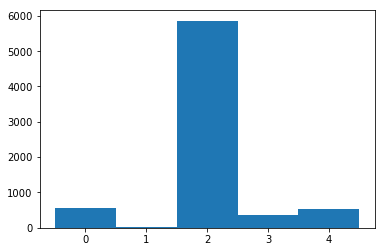

In [47]:
#各群數量

hist, bin_edges = np.histogram(y, bins = range(6))
plt.bar(bin_edges[:-1], hist, width = 1)
plt.show()

In [48]:
df_Reduc1.shape

(7323, 389)

In [49]:
y.shape

(7323,)

## 加入column y

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
df_Reduc1_y = df_Reduc1.assign(Cluster = y)

In [52]:
df_Reduc1_y.shape[1]

390

In [53]:
X_, y_ = df_Reduc1_y.iloc[:, 0:df_Reduc1_y.shape[1]-1].values, df_Reduc1_y.iloc[:, df_Reduc1_y.shape[1]-1].values

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3, random_state=0)

In [55]:
X_train.shape

(5126, 389)

In [56]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [57]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[ 2.9550618   2.75574945  2.64887077  2.53889631  2.4231441   2.38159372
  2.31134565  2.29329819  2.24383878  2.19426981  2.15399169  2.12551633
  2.08928145  2.06626149  2.05310499  2.03715431  1.99263264  1.95114706
  1.93037299  1.92346979  0.07213107  0.12314597  0.13693925  0.16082565
  1.87782598  0.17542493  1.86621721  1.8566118   1.84654231  1.82420815
  1.817193    1.79225113  0.202452    0.2088669   0.22208274  0.25145679
  0.25530247  0.2738507   0.27978951  1.75335912  0.3230378   0.33211471
  1.72705379  1.71672102  1.70881264  1.68863348  1.67967419  1.67601824
  1.65286753  1.64704501  1.63474233  1.61905697  1.61183258  1.58825372
  1.56465218  1.56097769  1.55488257  1.54006981  1.54579276  1.529399
  1.51967046  1.50477349  1.49913676  1.49693523  1.48431965  1.47754333
  1.47557584  1.46253279  1.45304516  1.45557061  1.44334439  1.4388062
  0.35109443  0.36005646  0.36636437  0.3708763   0.37405601  0.38005121
  0.38365336  0.38890137  0.391226    0.

In [58]:
len(eigen_vals)

389

In [59]:
tot = sum(eigen_vals)
# 將特徵值排序  並計算百分比
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
# 加總
cum_var_exp = np.cumsum(var_exp)

var_exp ,cum_var_exp

([0.0075950779262209354,
  0.0070828068170255129,
  0.0068081080197705838,
  0.0065254524655445406,
  0.0062279470037381922,
  0.0061211545257382066,
  0.005940603454581494,
  0.0058942180124217074,
  0.0057670978058083616,
  0.0056396960072213776,
  0.0055361734748004664,
  0.0054629863035844444,
  0.005369855680868482,
  0.0053106899703076783,
  0.0052768752343498714,
  0.0052358789098738163,
  0.0051214496407927645,
  0.0050148237058028526,
  0.0049614303354821865,
  0.0049436877940511603,
  0.0048263744211261049,
  0.0047965376367415415,
  0.0047718498736694136,
  0.0047459693481347398,
  0.0046885662555871252,
  0.0046705359886439913,
  0.0046064305604211859,
  0.0045064706138652063,
  0.0044388608570090481,
  0.0044123036413843868,
  0.0043919775706465656,
  0.0043401132508839001,
  0.0043170861622238077,
  0.0043076896447131275,
  0.004248187876933195,
  0.0042332228688551016,
  0.0042016026162984919,
  0.0041612882111004851,
  0.0041427201587841593,
  0.0040821179290141387,
  0

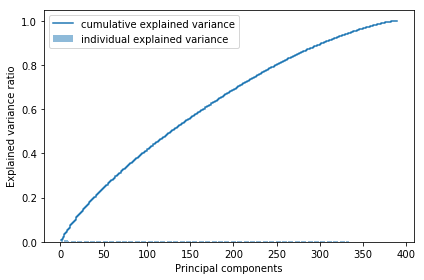

In [60]:
import matplotlib.pyplot as plt


plt.bar(range(1, len(eigen_vals)+1), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, len(eigen_vals)+1), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

In [61]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low

eigen_pairs.sort(reverse=True)


In [62]:
# 取前兩名重要的向量  並排列整齊
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ -7.09841390e-03  -1.30639649e-03]
 [  2.53796153e-02   5.95519906e-03]
 [  8.91002930e-02   1.59937304e-03]
 [ -4.03680990e-03   3.40265746e-03]
 [ -7.28621688e-03   1.39838072e-03]
 [  6.69530577e-02   1.13501918e-02]
 [  5.50241550e-03   2.44986500e-03]
 [ -2.69267099e-03  -8.51313278e-04]
 [ -3.03117306e-03   2.35786494e-04]
 [ -7.67530043e-03   5.65304091e-04]
 [  2.05053345e-02  -7.09217956e-03]
 [  3.38466830e-02  -2.41296782e-02]
 [ -4.87027446e-03  -1.03384266e-02]
 [  1.40581094e-01  -1.67310820e-03]
 [ -3.62596727e-02   1.04109235e-02]
 [  4.77356584e-03   3.87259496e-03]
 [  1.01928755e-02   8.79269825e-03]
 [  1.91611109e-02   1.41242129e-03]
 [ -4.99008607e-03   4.12127793e-03]
 [ -1.14674997e-02   6.60077381e-03]
 [  4.22194618e-03  -4.29701911e-03]
 [ -7.78891857e-03   4.33217169e-03]
 [ -1.05197090e-02   2.67670690e-03]
 [ -3.16080130e-04  -2.59811371e-03]
 [ -1.52362474e-03  -3.36537588e-04]
 [ -1.82450668e-03  -2.37457796e-03]
 [ -1.81919179e-02  -2.2435

In [63]:
np.unique(y_train)

array([ 0.,  1.,  2.,  3.,  4.])

In [70]:
y_train.shape

(5126,)

In [73]:
X_train_std

array([[-0.03712914, -0.02756307, -0.14854026, ..., -0.04489376,
        -0.1956215 , -0.10083063],
       [-0.03712914, -0.02756307, -0.14854026, ..., -0.04489376,
        -0.1956215 , -0.10083063],
       [-0.03712914, -0.02756307, -0.14854026, ..., -0.04489376,
        -0.1956215 ,  3.40379262],
       ..., 
       [-0.03712914, -0.02756307, -0.14854026, ..., -0.04489376,
         8.86674688, -0.10083063],
       [-0.03712914, -0.02756307, -0.14854026, ..., -0.04489376,
        -0.1956215 , -0.10083063],
       [-0.03712914, -0.02756307, -0.14854026, ..., -0.04489376,
        -0.1956215 , -0.10083063]])

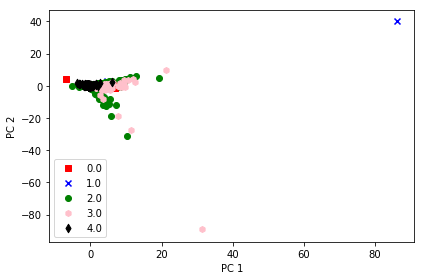

In [64]:
#所有訓練向量對前兩名特徵相量做投影  也就是做內積
X_train_pca = X_train_std.dot(w)
#作圖
colors = ['r', 'b', 'g', 'pink', 'black']
markers = ['s', 'x', 'o', 'h', 'd']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

plt.show()

In [229]:
X_train_std.shape

(5126, 389)

In [ ]:
## 用scikit learn做